In [13]:
!pip install ntscraper

In [14]:
import pandas as pd
from ntscraper import Nitter

# Initialize the scraper
scraper = Nitter(log_level=1, skip_instance_check=False)

# Retrieve tweets
tweets = scraper.get_tweets('elonmusk', mode='user', number=100)

# Check if tweets were found
if tweets['tweets']:
    # Create a list to hold each tweet's data as a dictionary
    data = []
    for tweet in tweets['tweets']:
        # Each tweet's details are stored as a dictionary
        tweet_data = {
            'date': tweet['date'],
            'text': tweet['text']
               # Assuming retweets count is available
        }
        data.append(tweet_data)
        print(tweet['text'])

    # Convert list of dictionaries to DataFrame
    tweet_df = pd.DataFrame(data)
    tweet_df.head()

else:
    print("No tweets found.")

Testing instances: 100%|██████████| 77/77 [01:27<00:00,  1.13s/it]
INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for elonmusk: 20 tweets, 0 threads...
INFO:root:Current stats for elonmusk: 40 tweets, 0 threads...
INFO:root:Current stats for elonmusk: 60 tweets, 0 threads...


The latest version of Tesla’s (supervised) self-driving will blow your mind
View of yesterday’s @Starlink deploy during an orbital sunrise
How to vote your Tesla shares
𝕏 is the #1 news app on the AppStore in Argentina, leading both the free and grossing categories. 🥇
At the risk of sounding elitist, I prefer IHOP
This sounds insane if accurate!  @CommunityNotes, please check
Why it is so important for @xAI’s @Grok to succeed. This is a much bigger deal than it may seem.
Act on press  This is a UI design hill I will die on, and it dismays me how often and hard I have had to fight for it.  Almost all interaction methods have a “press” and “release” event associated with them. Whenever possible, you should “do the thing” when you get the press event instead of waiting for the release event, because it makes the interaction feel substantially more responsive, and it reduces user errors by not allowing the focus to slide out of the hot box between press and release.  Even a “ballistic tap”

In [15]:
# Display dataframe with 'tweet timings', 'text' as columns
tweet_df.head()

,date,text
0,"May 8, 2024 · 2:08 AM UTC",The latest version of Tesla’s (supervised) sel...
1,"May 7, 2024 · 10:45 PM UTC",View of yesterday’s @Starlink deploy during an...
2,"May 7, 2024 · 6:43 PM UTC",How to vote your Tesla shares
3,"May 7, 2024 · 2:05 PM UTC",𝕏 is the #1 news app on the AppStore in Argent...
4,"May 7, 2024 · 6:37 PM UTC","At the risk of sounding elitist, I prefer IHOP"


In [16]:
!pip install pyspark

+-------+-----+
|   word|count|
+-------+-----+
|  press|    5|
| SpaceX|    5|
|      X|    4|
|   user|    4|
|  Tesla|    4|
|  birth|    4|
|     𝕏|    4|
| design|    4|
|Highway|    4|
|  there|    3|
+-------+-----+
only showing top 10 rows



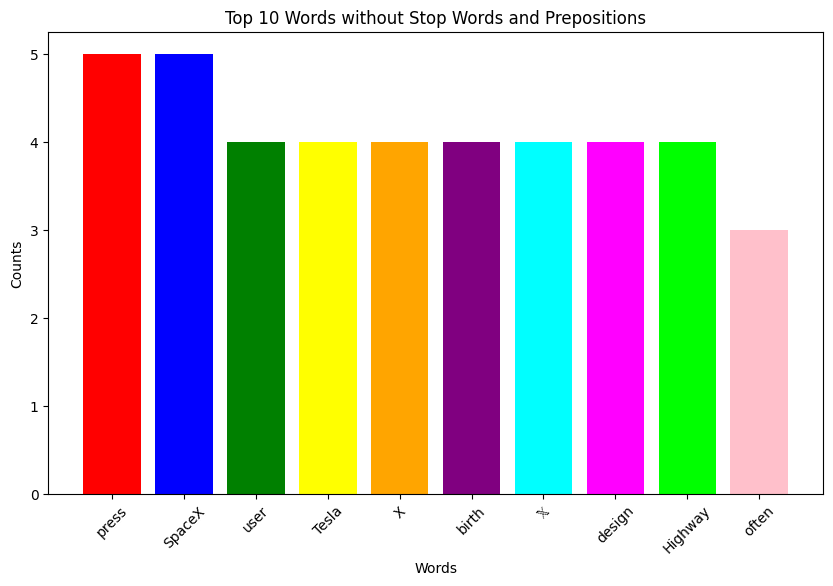

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, col
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Word Count Analysis without Stop Words and Prepositions") \
    .getOrCreate()

# List of common English stop words and prepositions
stop_words_and_prepositions = set([
    "the", "to", "and", "a", "of", "is", "in", "with", "for", "it", "you", "are", "I","have", "that", "your", "not","most",
    "on", "at", "from", "by", "about", "as", "into", "like", "through", "after","but", "should", "this","That","This","On",
    "over", "between", "out", "against", "during", "without", "before", "under", "around", "among", "The", "the","that",
    "has", "had", "will","was", "an", "over","or", "still", "because", "me", "more", "anything", "so", "now", "his","him"
])

# Assuming tweet_df is your Pandas DataFrame
# Convert the Pandas DataFrame to a PySpark DataFrame
df = spark.createDataFrame(tweet_df)

# Explode the words from the text column
words = df.select(explode(split(col("text"), "\\s+")).alias("word")) \
    .filter(col("word") != "")  # Exclude empty words resulting from multiple spaces

# Filter out stop words and prepositions
filtered_words = words.filter(~words.word.isin(stop_words_and_prepositions))

# Count the occurrences of each word
word_counts = filtered_words.groupBy("word").count()

# Sort the words by count
sorted_words = word_counts.orderBy(col("count").desc())

# Show the top 10 words
sorted_words.show(10)

# If using a notebook, convert to Pandas DataFrame for visualization
word_pdf = sorted_words.toPandas()

# Plotting the top 10 words
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink']
plt.bar(word_pdf['word'][:10], word_pdf['count'][:10], color=colors)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Words without Stop Words and Prepositions')
plt.xticks(rotation=45)
plt.show()

# Stop the Spark session
spark.stop()
